## Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the 
dataset have?

In [10]:
import pandas as pd
df=pd.DataFrame(pd.read_excel('flight_price.xlsx'))
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
#There are 10683 rows and 11 columsn are there

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the 
distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

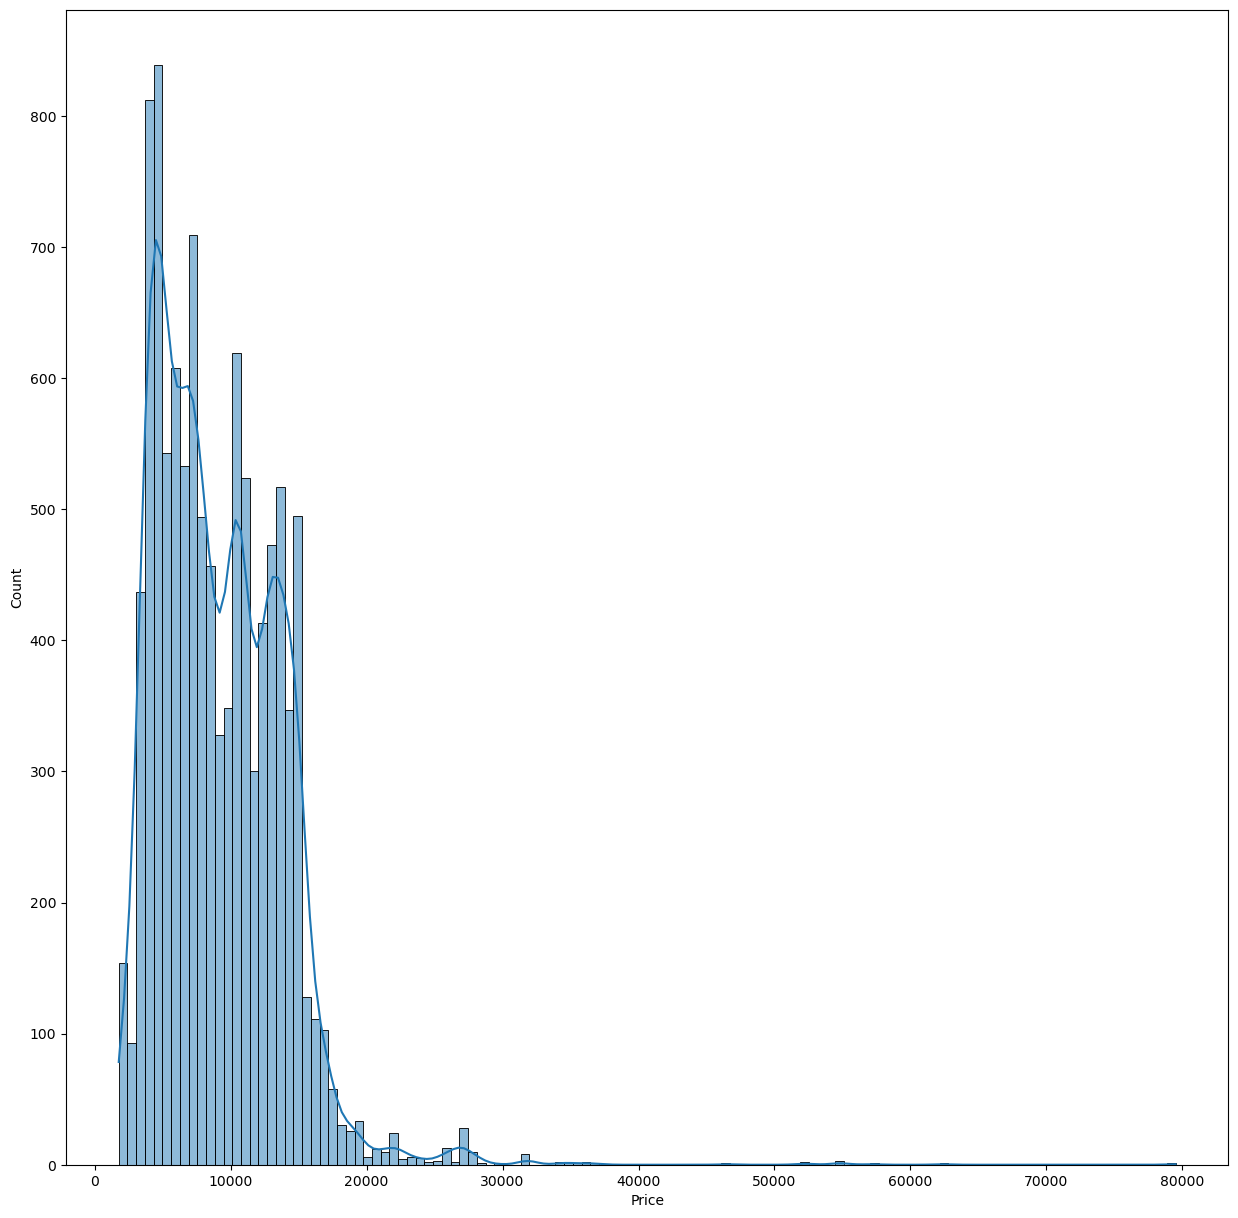

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
#plt.hist(x=df['Price'])
sns.histplot(x=df['Price'],kde=True)

In [20]:
# distribution of the plot right scewed histogram

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [22]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [27]:
(df['Price'].max()-df['Price'].min(),df['Price'].min(),df['Price'].max())

(77753, 1759, 79512)

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different 
airlines.

In [28]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [47]:
dd=pd.DataFrame(df.groupby(['Airline'])['Price'].mean()).reset_index()
dd

,Airline,Price
0,Air Asia,5590.260188
1,Air India,9611.210616
2,GoAir,5861.056701
3,IndiGo,5673.682903
4,Jet Airways,11643.923357
5,Jet Airways Business,58358.666667
6,Multiple carriers,10902.678094
7,Multiple carriers Premium economy,11418.846154
8,SpiceJet,4338.284841
9,Trujet,4140.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

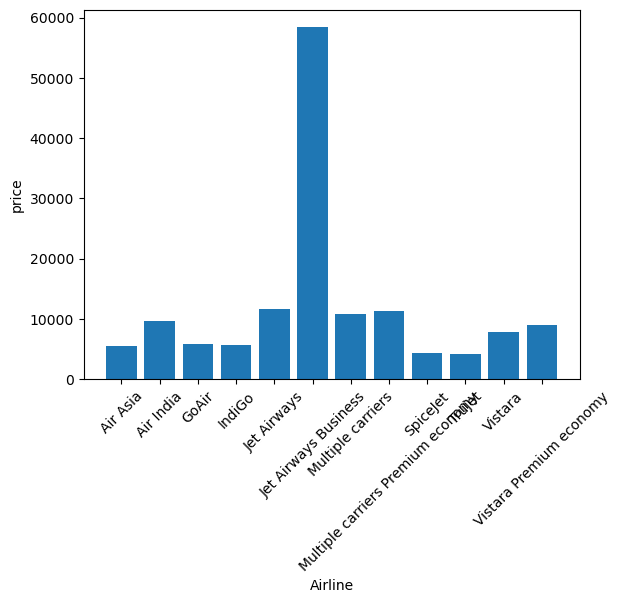

In [59]:
plt.bar(dd['Airline'],dd['Price'])
plt.xlabel('Airline')
plt.ylabel('price')
plt.xticks(rotation=45)

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how 
they may impact your analysis.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6851ead840>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6851eadd80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6851ead4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6851eae2c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6851eae4a0>],
 'means': []}

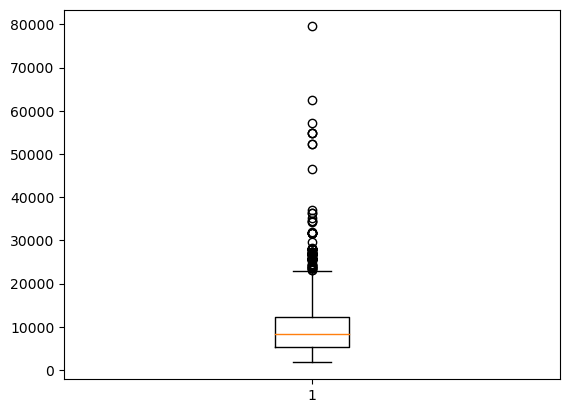

In [61]:
plt.boxplot(df['Price'])

In [75]:
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
QTR=Q3-Q1
df[df['Price']>(Q3+1.5*(Q3-Q1))]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [86]:
df[df['Price']<=(Q3+1.5*(Q3-Q1))].mean()

/tmp/ipykernel_77/3160787628.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['Price']<=(Q3+1.5*(Q3-Q1))].mean()


Price    8897.661724
dtype: float64

In [87]:
df['Price'].mean()

9087.064120565385

In [88]:
# there are 94 outlierrs are there in our data set
# these outliers moved Mean by 200 points

In [76]:
# there are 94 outlierrs are there in our data set

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset 
to identify the peak travel season. What features would you analyze to identify the peak season, and how 
would you present your findings to your boss?

In [89]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [90]:
#Airline, Duration, total stops and price are features look to analyse
# which airline prices are less with lesser stops and lower prices

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight 
Price dataset to identify any trends in flight prices. What features would you analyze to identify these 
trends, and what visualizations would you use to present your findings to your team?

In [92]:
#deaprture and arrival features will study to observe teh trend, and identify the better time to trave as findings.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the 
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to 
identify these factors, and how would you present your findings to the management team?

In [91]:
#number of stops, airline and duration might be looking to get the factors which influences flight prices

## Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does 
the dataset have?

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
#There are 10841 rows and 13 columsn are there

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different 
app categories.

In [3]:
df.groupby(['Category'])['Rating'].mean()

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [4]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [5]:
df1=df[df['Category']!='1.9']
df1.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

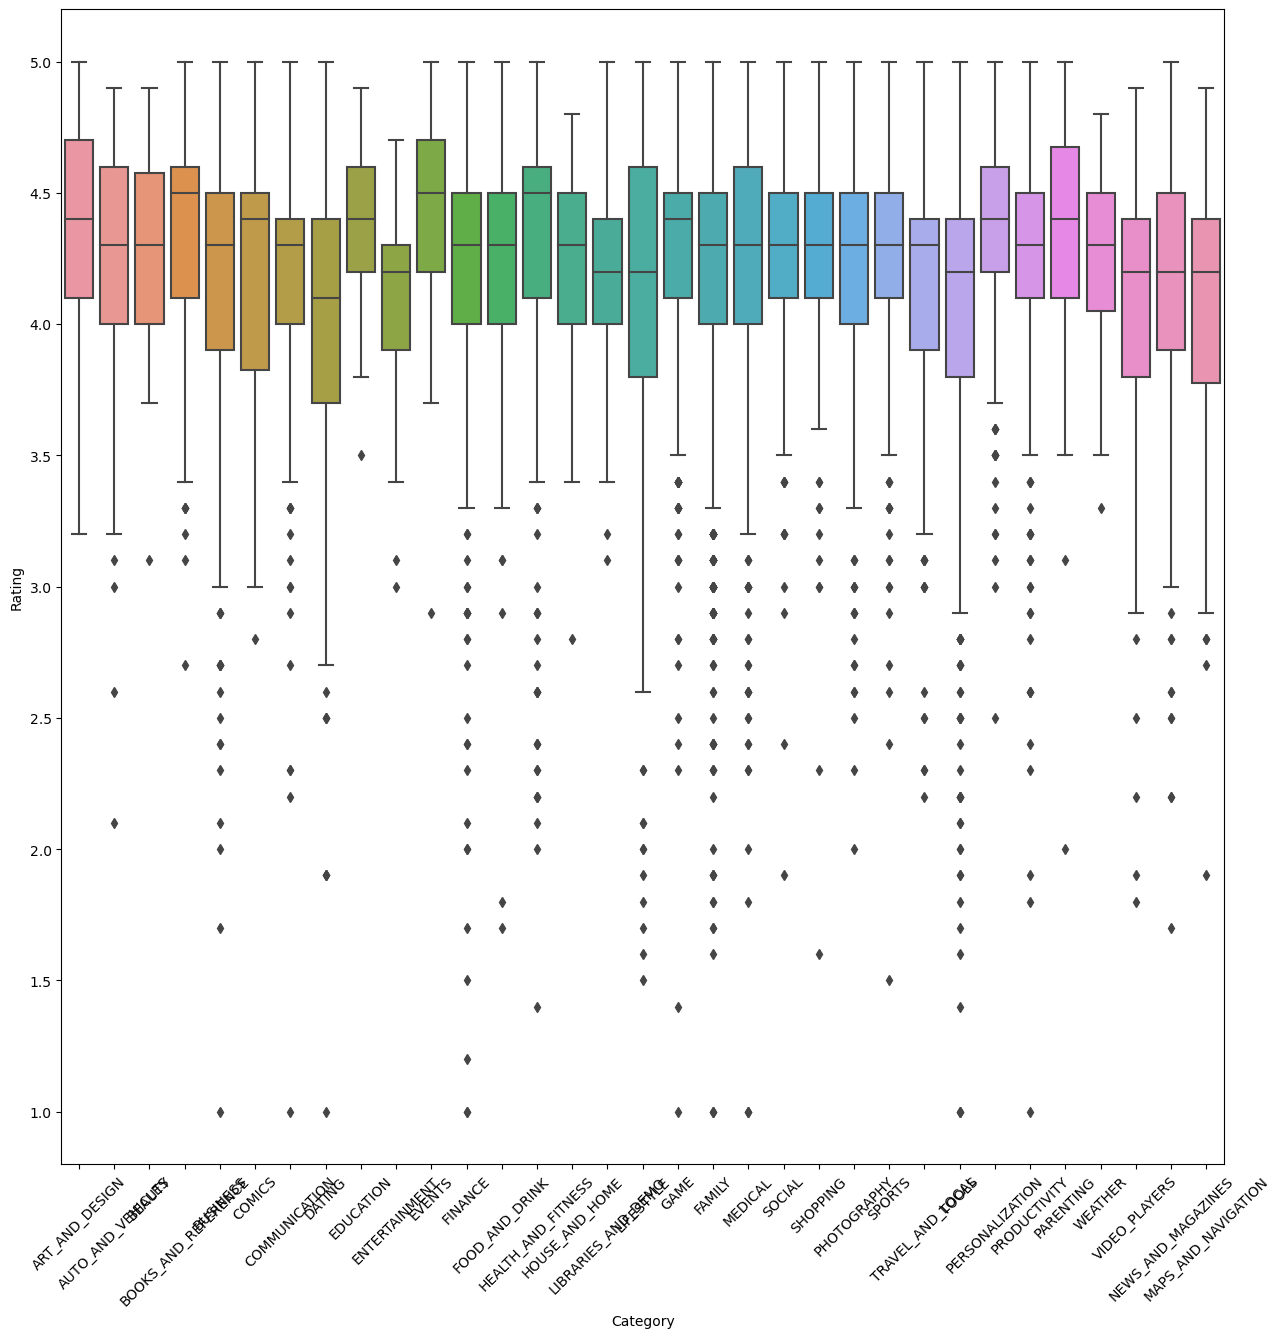

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.boxplot(x=df1['Category'],y=df1['Rating'])
plt.xticks(rotation=45)

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may 
impact your analysis.

## we can check if there is any missing values ind ata by using df.isnull().sum()
## If the missing values are not handled properly by the researcher, then he/she may end up drawing an inaccurate inference about the data.

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize 
the relationship.

In [10]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [11]:
import numpy as np
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)

In [12]:
df['Size']=df['Size'].str.replace('.','')

/tmp/ipykernel_161/3585642037.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Size']=df['Size'].str.replace('.','')


In [13]:
df['Size']

0        19000
1        14000
2        87000
3        25000
4        28000
         ...  
10836    53000
10837    36000
10838    95000
10839      NaN
10840    19000
Name: Size, Length: 10841, dtype: object

In [14]:
df['Size'].unique()

array(['19000', '14000', '87000', '25000', '28000', '56000', '29000',
       '33000', '31000', '12000', '20000', '21000', '37000', '27000',
       '55000', '17000', '39000', '42000', '70000', '23000', '60000',
       '61000', '46000', '92000', '52000', '11000', '24000', nan, '94000',
       '15000', '10000', '26000', '80000', '79000', '57000', '35000',
       '54000', '201', '36000', '86000', '16000', '34000', '89000',
       '38000', '32000', '18000', '22000', '45000', '98000', '90000',
       '67000', '30000', '71000', '74000', '64000', '82000', '99000',
       '49000', '95000', '50000', '59000', '13000', '73000', '68000',
       '40000', '72000', '91000', '23', '65000', '75000', '51000',
       '41000', '48000', '85000', '83000', '43000', '47000', '78000',
       '88000', '66000', '79', '84000', '118', '44000', '695', '62000',
       '18', '53000', '58000', '96000', '63000', '77000', '69000',
       '93000', '100000', '81000', '97000', '556', '526', '76000', '334',
       '232', '62

In [15]:
df1=df[df['Size'].isnull()==False]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,96000,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,95000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [16]:
df1['Size'].dtype

dtype('O')

Text(0, 0.5, 'size')

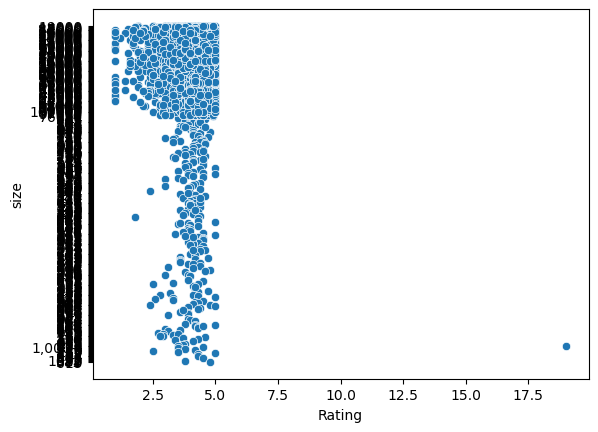

In [18]:
sns.scatterplot(y=df1['Size'],x=df1['Rating'])
plt.ylabel('size')

In [221]:
#lower sizes have better rating

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [45]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [46]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [47]:
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].str.replace('Everyone','0')

/tmp/ipykernel_161/2273221905.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


In [52]:
df['Price']=df['Price'].astype(float)

In [53]:
dd1=pd.DataFrame(df.groupby(['Category'])['Price'].mean()).reset_index()

In [54]:
dd1

,Category,Price
0,1.9,0.000000
1,ART_AND_DESIGN,0.091846
2,AUTO_AND_VEHICLES,0.158471
3,BEAUTY,0.000000
4,BOOKS_AND_REFERENCE,0.518485
5,BUSINESS,0.402761
6,COMICS,0.000000
7,COMMUNICATION,0.214832
8,DATING,0.134316
9,EDUCATION,0.115128


<AxesSubplot: xlabel='Price', ylabel='Category'>

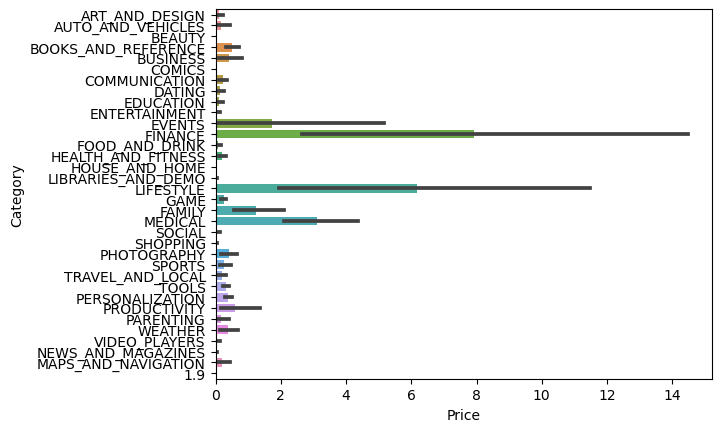

In [58]:
sns.barplot(x=df['Price'],y=df['Category'],data=df)

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps 
with the highest number of installs.

In [64]:
df_apps=df[['App','Installs']]
df_apps

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,"10,000+"
1,Coloring book moana,"500,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...","5,000,000+"
3,Sketch - Draw & Paint,"50,000,000+"
4,Pixel Draw - Number Art Coloring Book,"100,000+"
...,...,...
10836,Sya9a Maroc - FR,"5,000+"
10837,Fr. Mike Schmitz Audio Teachings,100+
10838,Parkinson Exercices FR,"1,000+"
10839,The SCP Foundation DB fr nn5n,"1,000+"


In [91]:
df_apps.sort_values(by='Installs',ascending=False)[1:10]

,App,Installs
420,UC Browser - Fast Download Private & Secure,"500,000,000+"
474,LINE: Free Calls & Messages,"500,000,000+"
3767,Flipboard: News For Our Time,"500,000,000+"
3574,Cloud Print,"500,000,000+"
3326,Gboard - the Google Keyboard,"500,000,000+"
431,Viber Messenger,"500,000,000+"
4222,imo free video calls and chat,"500,000,000+"
3235,Google Translate,"500,000,000+"
1842,Candy Crush Saga,"500,000,000+"


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the 
Google Playstore dataset to identify the most popular app categories. How would you approach this 
task, and what features would you analyze to make recommendations to the company?

In [94]:
df['Category'].value_counts() # we will consider teh features as category to analyse the type of app to recommend

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the 
most successful app developers. What features would you analyze to make recommendations to the 
company, and what data visualizations would you use to present your findings?;

In [95]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [96]:
# App developer data is not available

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to 
launch a new app. What features would you analyze to make recommendations to the company, and 
what data visualizations would you use to present your findings?

In [97]:
# we will split Last developed data as day, month and year to identify the best day or month.
# we will consider installs and Last uodated date featurtes for this analysis.
# we will plot number of installs vs day and month in barplot to get maximum installs on each date and month.